In [2]:
# %cd ..
import numpy as np, matplotlib.pyplot as plt
import inputs, simuls, analysis
results = analysis.GetResults(verbose=True)

# PenEasy SPC simulation

In [ ]:
pid = 'SPC'
ver = '24'
# Initialize PenEasy Input Editor
peneasy_inps = inputs.PenEasy(verbose=True)

# Initialize Simulators (identified by pid)
peneasy_sims = simuls.PenEasy(verbose=True)
peneasy_sims.activate_pid(pid, ver)

In [ ]:
MATS = {'water' : ['water', 1, 1.00+00]}
SIZE = [20]*3
STEP = [0.3]*3  #cm
nhist = "1e6"

peneasy_inps.edit_voxSize(pid, SIZE, STEP)
peneasy_inps.edit_seed(pid, 12345, 54321)
peneasy_inps.edit_mat(pid, MATS, SIZE, STEP)
peneasy_inps.edit_source_nhist(pid, nhist)

In [ ]:
isotopes = ["N13", "O15", "F18", "Cu64", "Ga68", "Rb82", "I124"]

peneasy_inps.verbose = False
for iso in isotopes:
    print(f"Simulating {iso}")
    res_folder = f"RESULTS/SPC/Water/PenEasy20{ver}_xyz"
    peneasy_inps.edit_isotope(pid, iso)
    peneasy_sims.simulate(pid, get_times=True, time_samples=1, output_dir=res_folder, final_file=f"{iso}.dat.original")

# PeneloPET simulation

In [2]:
pid = '2024'
# Initialize PeneloPET Input Editor
penelopet_inps = inputs.PeneloPET(verbose=True)

# Initialize Simulators (identified by pid)
penelopet_sims = simuls.PeneloPET(verbose=True)
penelopet_sims.activate_pid('2024')

PeneloPET 2024 activated


In [3]:
MATS = {'water' : ['water', 0, 1.00+00]}
nhist = "1.1e6"

pid = '2024'
penelopet_inps.edit_seed(pid, 12345, 54321)
penelopet_inps.edit_mat(pid, MATS)
penelopet_inps.edit_source_activity(pid, nhist)

"penelopet/work/main/main.inp" random seeds modified to 12345 and 54321
"penelopet/work/main/object.inp" material modified to 1 (water)
"penelopet/work/main/source.inp" activity modified to 1.1e6


In [4]:
isotopes = ["C11", "N13", "O15", "F18", "Cu64", "Ga68", "Rb82", "I124"] #
res_folder = "RESULTS/SPC/Water/PeneloPET2024_xyz"

penelopet_inps.verbose = False
for iso in isotopes:
    print(f"Simulating {iso}")
    penelopet_inps.edit_isotope(pid, iso)
    if iso == "I124":
        penelopet_inps.edit_source_activity(pid, str(float(nhist)*3.7))
    else:
        penelopet_inps.edit_source_activity(pid, nhist)
    penelopet_sims.simulate(pid, get_times=True, time_samples=1, output_dir=res_folder, final_file=f"{iso}")

Simulating C11
PeneloPET 2024 real time: 20832.855 +- 0.000 s
Simulating N13
PeneloPET 2024 real time: 21861.342 +- 0.000 s
Simulating O15
PeneloPET 2024 real time: 24407.980 +- 0.000 s
Simulating F18
PeneloPET 2024 real time: 18926.513 +- 0.000 s
Simulating Cu64
PeneloPET 2024 real time: 18724.306 +- 0.000 s
Simulating Ga68
PeneloPET 2024 real time: 23739.879 +- 0.000 s
Simulating Rb82
PeneloPET 2024 real time: 31628.101 +- 0.000 s
Simulating I124
PeneloPET 2024 real time: 45657.556 +- 0.000 s


In [5]:
times_file = res_folder + "/" + pid + "_times.txt"
times = np.loadtxt(times_file).astype("str")
times[:,1], times[:,0] = times[:,0], isotopes
np.savetxt(times_file, times, fmt='%s')

# vGATE 9.x simulation

In [ ]:
pid = '9'
# Initialize GATE Input Editor
gate_inps = inputs.GATE(verbose=True)

# Initialize Simulators (identified by pid)
gate_sims = simuls.GATE(verbose=True)
gate_sims.activate_pid(pid, output_format='dat')

In [ ]:
MATS = {'water' : ['Water', 6, 1.00+00]}
SIZE = [10, 10, 10]
STEP = [0.4, 0.4, 0.4]  #cm
nhist = "1e6"

gate_inps.edit_voxSize(pid, SIZE, STEP)
gate_inps.edit_seed(pid, 12345, 54321)
gate_inps.edit_mat(pid, MATS, SIZE, STEP)
gate_inps.edit_source_nhist(pid, nhist)

In [ ]:
isotopes = ["C11", "N13", "O15", "F18", "Cu64", "Ga68", "Rb82", "I124"] #
res_folder = "RESULTS/SPC/Water/GATE93_xyz"

gate_inps.verbose = False
for iso in isotopes:
    print(f"Simulating {iso}")
    gate_inps.edit_isotope(pid, iso)
    gate_sims.simulate(pid, get_times=True, time_samples=1, output_dir=res_folder, final_file=f"{iso}")


In [ ]:
times_file = res_folder + "/" + pid + "_times.txt"
times = np.loadtxt(times_file).astype("str")
times[:,1], times[:,0] = times[:,0], isotopes
np.savetxt(times_file, times, fmt='%s')

# Results analysis

In [3]:
program_folder = "PeneloPET2024_xyz"
folder = f"RESULTS/SPC/Water/{program_folder}"
trim = int(1e6)

rthresh = {"C11" : 5, "N13" : 6, "O15" : 9, "F18" : 3, "Cu64" : 4, "Ga68" : 10, "Rb82" : 17.5, "I124" : 12}  #water

for iso in rthresh.keys():
    if program_folder == "GATE7_xyz" and iso not in ["C11", "O15", "F18"]:
        continue
    print(f"Filtering {iso}")
    threshold = rthresh[iso] #mm
    analysis.filter_rmax(f"{folder}/{iso}.dat.original", f"{folder}/{iso}.dat", threshold=threshold, trim=trim, fmt='%.6f')

Filtering C11
Filtered 'RESULTS/SPC/Water/PeneloPET2024_xyz/C11.dat.original' to 'RESULTS/SPC/Water/PeneloPET2024_xyz/C11.dat': 0 points removed
Filtering N13
Filtered 'RESULTS/SPC/Water/PeneloPET2024_xyz/N13.dat.original' to 'RESULTS/SPC/Water/PeneloPET2024_xyz/N13.dat': 1 points removed
Filtering O15
Filtered 'RESULTS/SPC/Water/PeneloPET2024_xyz/O15.dat.original' to 'RESULTS/SPC/Water/PeneloPET2024_xyz/O15.dat': 2 points removed
Filtering F18
Filtered 'RESULTS/SPC/Water/PeneloPET2024_xyz/F18.dat.original' to 'RESULTS/SPC/Water/PeneloPET2024_xyz/F18.dat': 0 points removed
Filtering Cu64
Filtered 'RESULTS/SPC/Water/PeneloPET2024_xyz/Cu64.dat.original' to 'RESULTS/SPC/Water/PeneloPET2024_xyz/Cu64.dat': 0 points removed
Filtering Ga68
Filtered 'RESULTS/SPC/Water/PeneloPET2024_xyz/Ga68.dat.original' to 'RESULTS/SPC/Water/PeneloPET2024_xyz/Ga68.dat': 24 points removed
Filtering Rb82
Filtered 'RESULTS/SPC/Water/PeneloPET2024_xyz/Rb82.dat.original' to 'RESULTS/SPC/Water/PeneloPET2024_xyz/Rb8

In [ ]:
histo_bins = 201
histo_step = .01 #cm
isotopes = ["C11", "N13", "O15", "F18", "Cu64", "Ga68", "Rb82", "I124"] 
pfolders = {
    "PHITS 3.3":"PHITS_xyz",
    "PenEasy 2020":"PenEasy_xyz",
    "PeneloPET 2024":"PeneloPET2024_xyz",
    "GATE 9.2":"GATE92_xyz",
    "GATE 9.3":"GATE93_xyz",
    "GATE 7.0":"GATE7_xyz",
}

labels_iso = {iso:[] for iso in isotopes}
labels_prg = {p:[] for p in pfolders.keys()}

results.active_results.clear()
for iso in isotopes:
    for pname, pfolder in pfolders.items():
        if pfolder == "GATE7_xyz" and iso not in ["C11", "O15", "F18"]: continue
        # file with results
        rf = f"RESULTS/SPC/Water/{pfolder}/{iso}.dat"
        # result label
        rl = f"{pname} {iso}"

        # load results
        results.load(rl, rf, [histo_bins]*3, [histo_step]*3)

        # append label to labels
        labels_iso[iso].append(rl)
        labels_prg[pname].append(rl)

PHITS 3.3 C11 loaded
PenEasy 2020 C11 loaded
PeneloPET 2024 C11 loaded
GATE 9.2 C11 loaded
GATE 9.3 C11 loaded
GATE 7.0 C11 loaded
PHITS 3.3 N13 loaded
PenEasy 2020 N13 loaded
PeneloPET 2024 N13 loaded
GATE 9.2 N13 loaded
GATE 9.3 N13 loaded
PHITS 3.3 O15 loaded
PenEasy 2020 O15 loaded
PeneloPET 2024 O15 loaded
GATE 9.2 O15 loaded
GATE 9.3 O15 loaded
GATE 7.0 O15 loaded
PHITS 3.3 F18 loaded
PenEasy 2020 F18 loaded
PeneloPET 2024 F18 loaded
GATE 9.2 F18 loaded
GATE 9.3 F18 loaded
GATE 7.0 F18 loaded
PHITS 3.3 Cu64 loaded
PenEasy 2020 Cu64 loaded
PeneloPET 2024 Cu64 loaded
GATE 9.2 Cu64 loaded
GATE 9.3 Cu64 loaded
PHITS 3.3 Ga68 loaded
PenEasy 2020 Ga68 loaded
PeneloPET 2024 Ga68 loaded
GATE 9.2 Ga68 loaded
GATE 9.3 Ga68 loaded
PHITS 3.3 Rb82 loaded
PenEasy 2020 Rb82 loaded
PeneloPET 2024 Rb82 loaded
GATE 9.2 Rb82 loaded
GATE 9.3 Rb82 loaded
PHITS 3.3 I124 loaded
PenEasy 2020 I124 loaded
PeneloPET 2024 I124 loaded
GATE 9.2 I124 loaded
GATE 9.3 I124 loaded


In [5]:
results.data_analysis()

Size of annihilations sample:
     PHITS 3.3 C11                           	    988366
     PenEasy 2020 C11                        	   1000000
     PeneloPET 2024 C11                      	   1000000
     GATE 9.2 C11                            	   1000000
     GATE 9.3 C11                            	   1000000
     GATE 7.0 C11                            	   1000000
     PHITS 3.3 N13                           	    984131
     PenEasy 2020 N13                        	   1000000
     PeneloPET 2024 N13                      	   1000000
     GATE 9.2 N13                            	   1000000
     GATE 9.3 N13                            	   1000000
     PHITS 3.3 O15                           	    974422
     PenEasy 2020 O15                        	   1000000
     PeneloPET 2024 O15                      	   1000000
     GATE 9.2 O15                            	   1000000
     GATE 9.3 O15                            	   1000000
     GATE 7.0 O15                            	   1000000
 

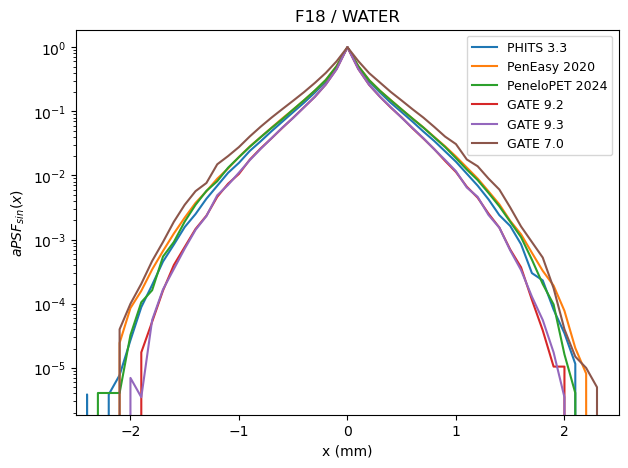

In [18]:
iso = "F18"
l = labels_iso[iso]
sl = list(labels_prg.keys())
if iso not in ["C11", "O15", "F18"]:
    sl.remove("GATE 7.0")
sl = dict(zip(l, sl))
plt.figure(figsize=(7,5))
results.plot_aPSFx(sin=True, lim=2.5, log_scale=True, labels=l, sublabels=sl, title=f"{iso} / WATER")

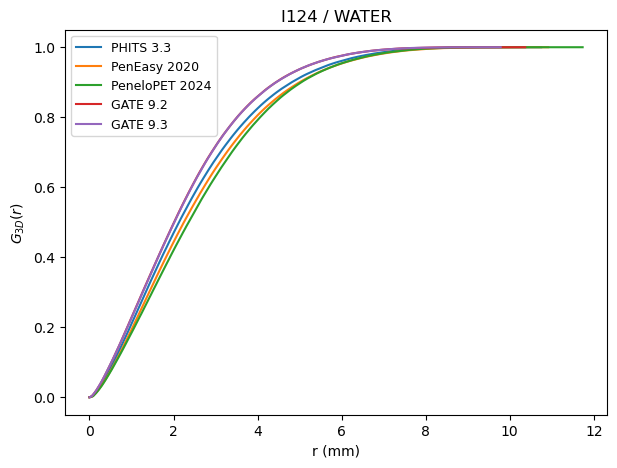

In [12]:
iso = "I124"
l = labels_iso[iso]
sl = list(labels_prg.keys())
if iso not in ["C11", "O15", "F18"]:
    sl.remove("GATE 7.0")
sl = dict(zip(l, sl))
plt.figure(figsize=(7,5))
results.plot_G3D_nohist(labels=l, sublabels=sl, title=f"{iso} / WATER")

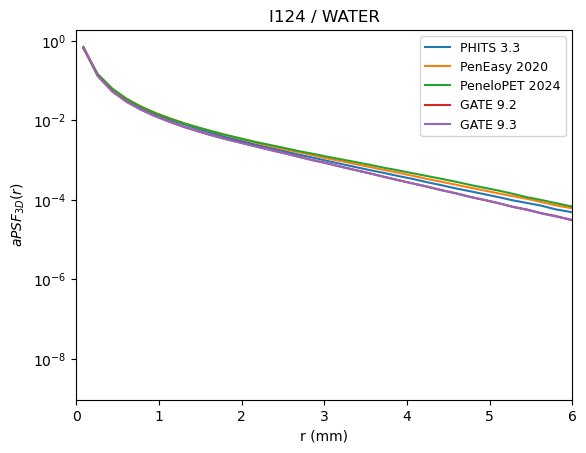

In [24]:
iso = "I124"
l = labels_iso[iso]
sl = list(labels_prg.keys())
if iso not in ["C11", "O15", "F18"]:
    sl.remove("GATE 7.0")
sl = dict(zip(l, sl))
results.plot_aPSF3D(sin=False, lim=6, log_scale=True, labels=l, sublabels=sl, title=f"{iso} / WATER")

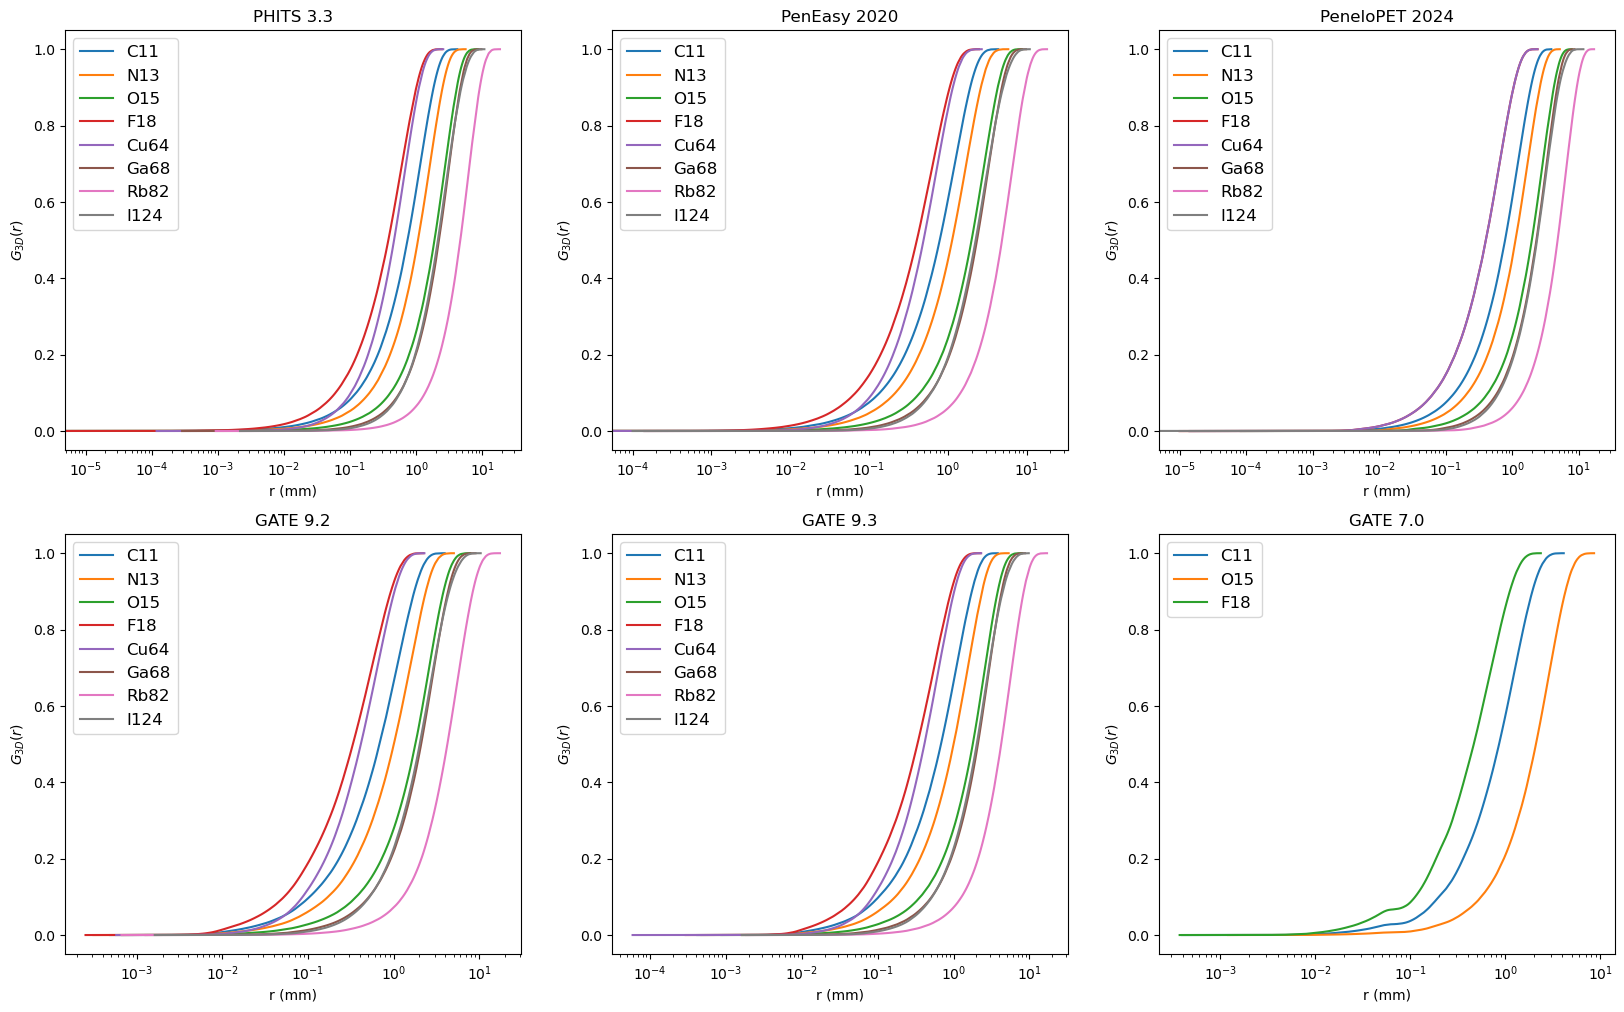

In [15]:
plt.figure(figsize=(20,12))
kmax = len(labels_prg)
max_cols = 3
max_rows = int(np.ceil(kmax/max_cols))
for k, p in enumerate(labels_prg.keys()):
    l = labels_prg[p]
    sl = dict(zip(l, isotopes if p!="GATE 7.0" else ["C11", "O15", "F18"]))
    plt.subplot(max_rows, max_cols, k+1)
    results.plot_G3D_nohist(labels=l, sublabels=sl, title=f"{p}", legend_size=12)
    plt.xscale("log")
plt.show()# PR proportionality

# PR proportionality

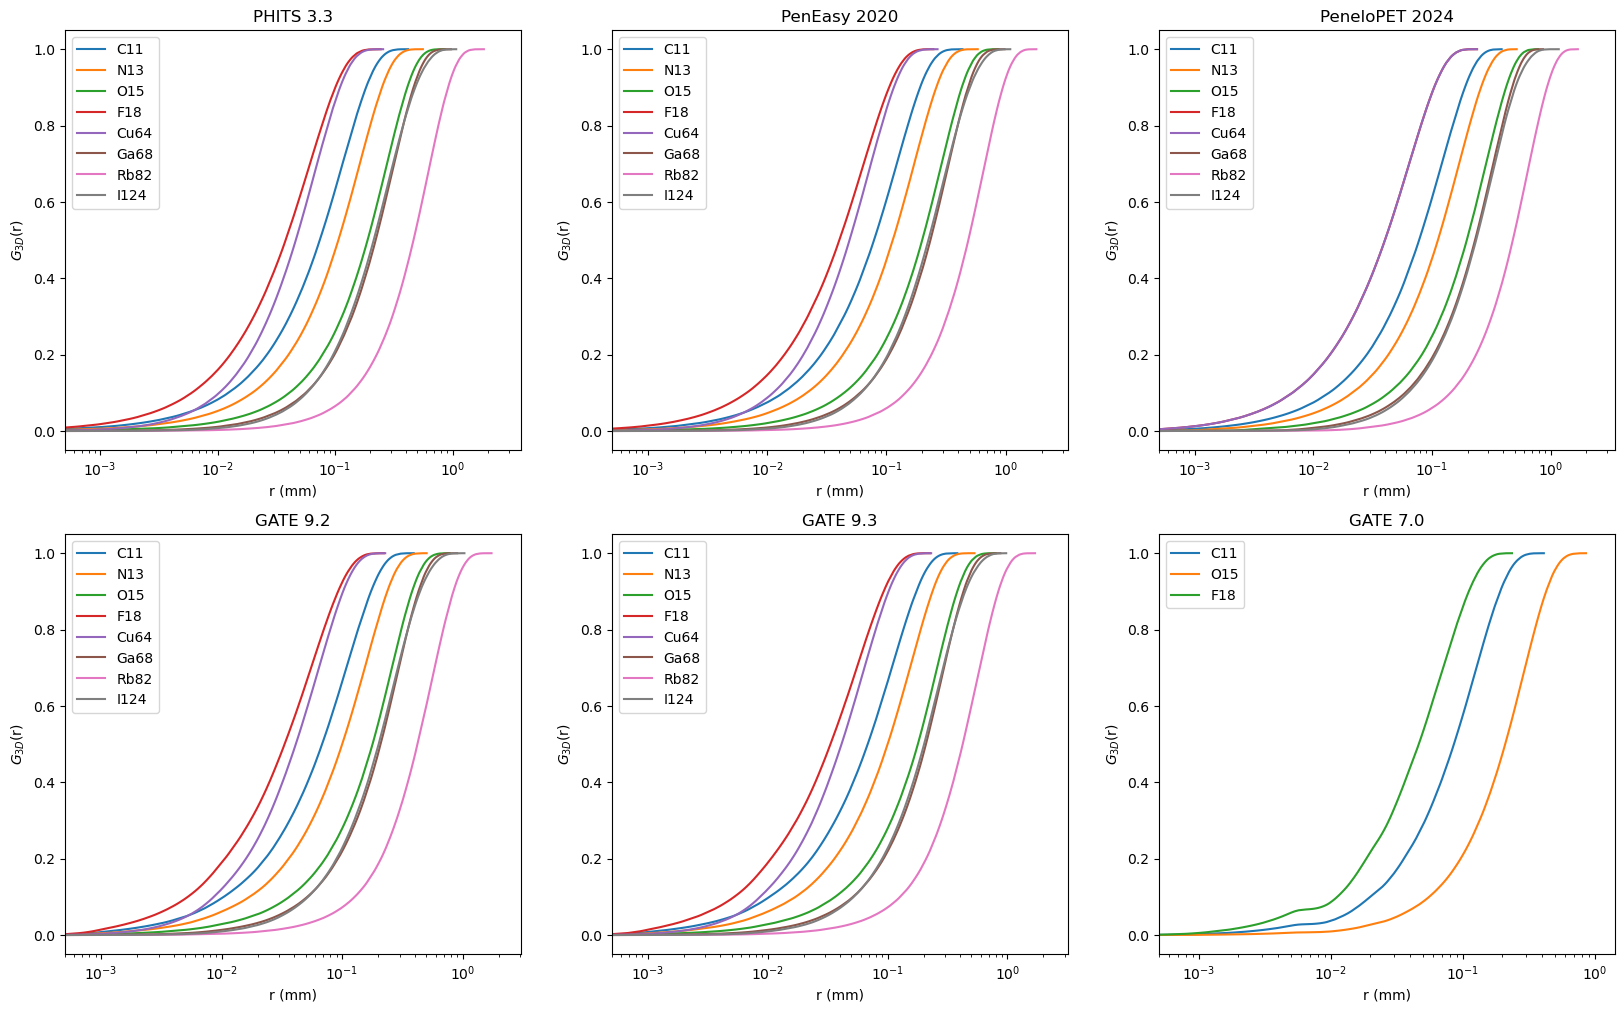

In [19]:
kmax = len(labels_prg)
max_cols = 3
max_rows = int(np.ceil(kmax/max_cols))
mat = "Water"

plt.figure(figsize=(20, 12))
for k, p in enumerate(pfolders.keys()):
    plt.subplot(max_rows, max_cols, k+1)
    plt.title(f"{p}")
    plt.xlabel("r (mm)")
    plt.ylabel(r"$G_{3D}$(r)")
    for iso in isotopes if p!="GATE 7.0" else ["C11", "O15", "F18"]:
        l = f"{p} {iso}"
        res = results.active_results[l]
        x = res.rsort
        x = x
        y = res.G3D_nohist
        plt.plot(x, y, label=f"{iso}")
    plt.xscale('log')
    plt.xlim(5e-4, None)
    plt.legend()


plt.show()

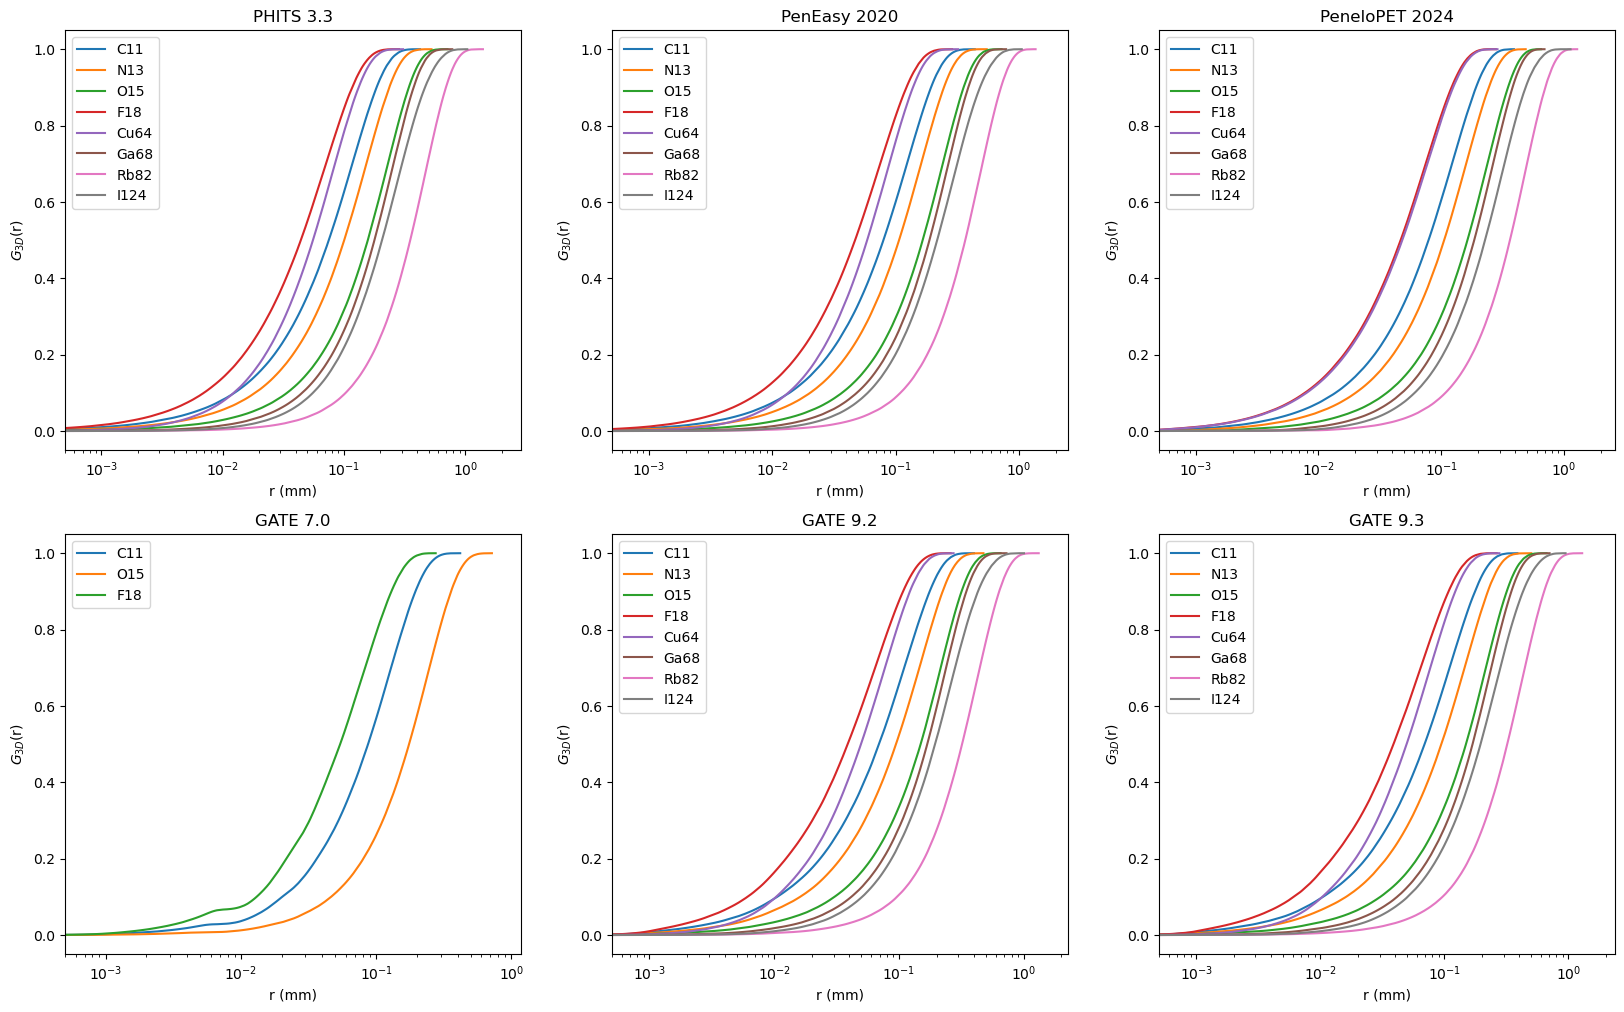

In [35]:
Qs = {  # MeV
    "C11": 0.96,
    "N13": 1.19,
    "O15": 1.73,
    "F18": 0.634,
    "Cu64": 0.578,
    "Ga68": 1.907,
    "Rb82": 2.30,
    "I124": 1.1
}
 
kmax = len(labels_prg)
max_cols = 3
max_rows = int(np.ceil(kmax/max_cols))

plt.figure(figsize=(20, 12))
for k, p in enumerate(pfolders.keys()):
    plt.subplot(max_rows, max_cols, k+1)
    plt.title(f"{p}")
    plt.xlabel("r (mm)")
    plt.ylabel(r"$G_{3D}$(r)")
    for iso in isotopes if p!="GATE 7.0" else ["C11", "O15", "F18"]:
        l = f"{p} {iso}"
        res = results.active_results[l]
        x = res.rsort
        x = x/Qs[iso]**(1/3)
        y = res.G3D_nohist
        plt.plot(x, y, label=f"{iso}")
    plt.xscale('log')
    plt.xlim(5e-4, None)
    plt.legend()


plt.show()

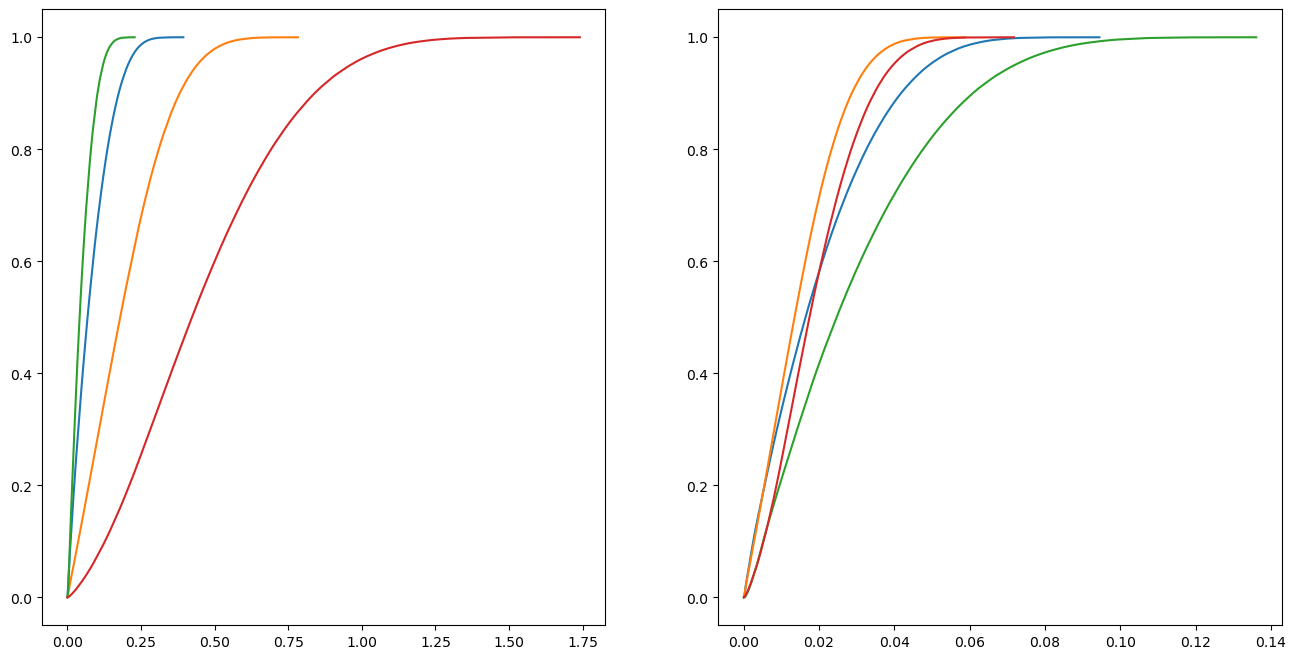

In [106]:
Qs = {  # MeV
    "C11": 0.96,
    "N13": 1.19,
    "O15": 1.73,
    "F18": 0.634,
    "Cu64": 0.578,
    "Ga68": 1.907,
    "Rb82": 2.30,
    "I124": 1.1
}
 
kmax = len(labels_prg)
max_cols = 3
max_rows = int(np.ceil(kmax/max_cols))

plt.figure(figsize=(16, 8))
p = "GATE 9.2"
for iso in isotopes[::2] if p!="GATE 7.0" else ["C11", "O15", "F18"]:
    l = f"{p} {iso}"
    res = results.active_results[l]
    x = res.rsort
    y = res.G3D_nohist

    plt.subplot(1,2,1)
    plt.plot(x, y, label=f"{iso}")
    # plt.xscale('log')
    # plt.xlim(5e-4, 1e1)

    plt.subplot(1,2,2)
    x = x/(0 + Qs[iso] + 3*Qs[iso]**2 + 0.5* Qs[iso]**3)**(1)
    plt.plot(x, y, label=f"{iso}")
    # plt.xscale('log')
    # plt.xlim(5e-4, 1e1)

plt.show()